In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.input_area pre {font-family: Consolas; font-size: 15pt; line-height: 140%;}</style>"))
display(HTML("<style>.output_area pre {font-family: Consolas; font-size: 15pt; line-height: 140%;}</style>"))

In [2]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
import xgboost as xgb

In [173]:
# print(dir())

# 캐글과 데이콘 보면서 따라해보고 혼자 생각한거 해보기

In [5]:
ta_train=pd.read_csv('train.csv')
ta_test=pd.read_csv('test.csv')
ta_submit=pd.read_csv('gender_submission.csv')

In [17]:
print(ta_train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [27]:
print(ta_train.shape)
ta_train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
ta_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [20]:
ta_train['PassengerId'].head()

0    1
1    2
2    3
3    4
4    5
Name: PassengerId, dtype: int64

In [22]:
ta_train.info()
ta_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [6]:
(ta_train.isna().sum()/ta_train.shape[0])*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [24]:
ta_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
ta_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Nilsson, Miss. Helmina Josefina",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [117]:
ta_train.groupby(['Pclass','Survived']).mean()   # 오호

PassengerId        Age     SibSp     Parch       Fare
Pclass Survived                                                       
1      0          410.300000  43.695312  0.287500  0.300000  64.684008
       1          491.772059  35.368197  0.492647  0.389706  95.608029
2      0          452.123711  33.544444  0.319588  0.144330  19.412328
       1          439.080460  25.901566  0.494253  0.643678  22.055700
3      0          453.580645  26.555556  0.672043  0.384409  13.669364
       1          394.058824  20.646118  0.436975  0.420168  13.694887

In [121]:
ta_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [83]:
ta_train[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived',ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [88]:
ta_train[['Pclass','Survived']].groupby(['Pclass']).count().sort_values(by='Survived',ascending=False)
# 카운트는 그냥 그룹별사람수
# 썸은 그룹별생존자수
# 민은 그룹별생존률

,Survived
Pclass,
3,491
1,216
2,184


In [93]:
ta_train[['SibSp','Survived']].groupby(['SibSp']).mean().sort_values(by='Survived',ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [116]:
ta_train[['Parch','Survived']].groupby(['Parch']).mean().sort_values(by='Survived',ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [29]:
ta_train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


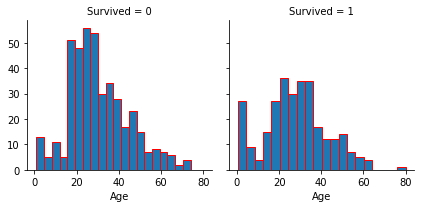

In [40]:
g=sns.FacetGrid(ta_train,col='Survived')
g.map(plt.hist,'Age',bins=20,edgecolor='r')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


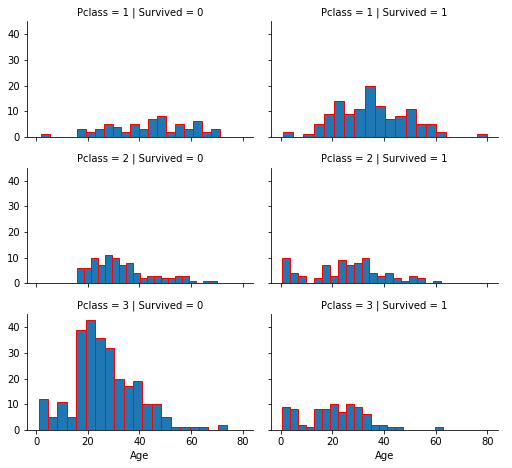

In [45]:
grid=sns.FacetGrid(ta_train,col='Survived',row='Pclass',size=2.2,aspect=1.6)
grid.map(plt.hist,'Age',bins=20,edgecolor='r')
grid.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis)

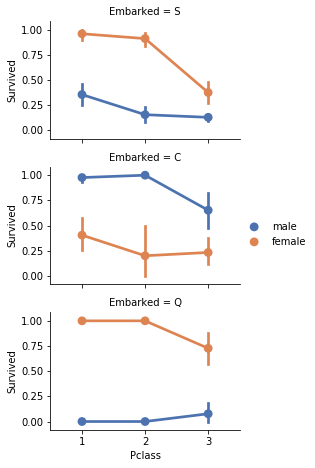

In [46]:
grid=sns.FacetGrid(ta_train,row='Embarked',size=2.2,aspect=1.6)
grid.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
grid.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


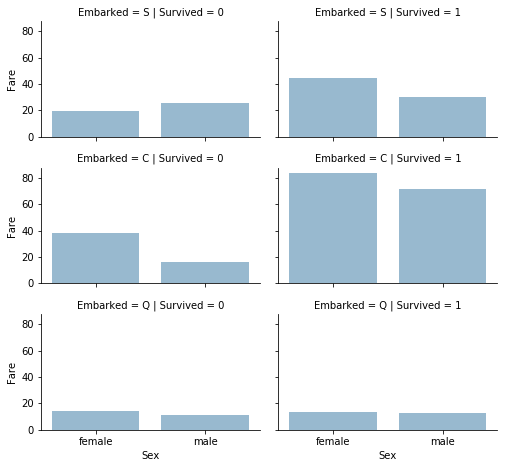

In [53]:
grid=sns.FacetGrid(ta_train,row='Embarked',col='Survived',size=2.2,aspect=1.6)
grid.map(sns.barplot,'Sex','Fare',alpha=.5,ci=None)
grid.add_legend()

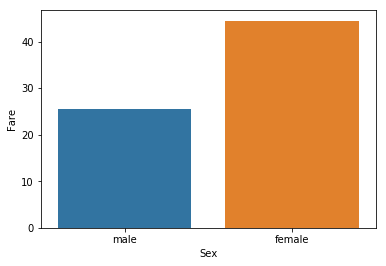

In [105]:
sns.barplot(x='Sex',y='Fare',data=ta_train,ci=None)

In [111]:
ta_train[['Sex','Fare']].groupby('Sex').mean()

,Fare
Sex,
female,44.479818
male,25.523893


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


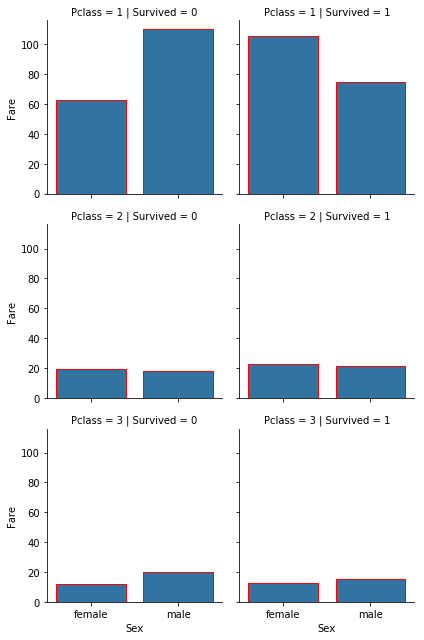

In [114]:
grid=sns.FacetGrid(ta_train,row='Pclass',col='Survived')
grid.map(sns.barplot,'Sex','Fare',edgecolor='r',ci=None)

In [36]:
ta_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


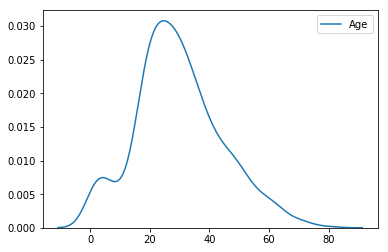

In [38]:
sns.kdeplot(ta_train['Age'])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


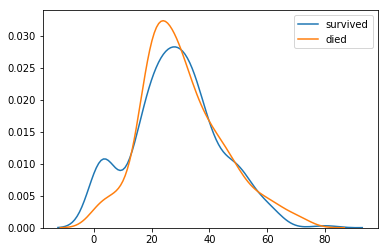

In [202]:
sns.kdeplot(ta_train.loc[ta_train['Survived']==1,'Age'],label='survived')
sns.kdeplot(ta_train.loc[ta_train['Survived']==0,'Age'],label='died')

In [50]:
print(ta_train['SibSp'].value_counts())
print(ta_train['SibSp'].describe())

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64


In [34]:
ta_train.isna().sum()/ta_train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [35]:
ta_test.isna().sum()/ta_test.shape[0]

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

In [60]:
ta_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
ta_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
ta_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [36]:
ta_train[ta_train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [37]:
ta_train['Embarked'].value_counts()  # S가 가장많다.

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [79]:
ta_train['Embarked']=ta_train['Embarked'].fillna('S')  # 가장 많은 S로 결측값 2개를 채운다.
ta_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [80]:
ta_train=ta_train.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)
ta_test=ta_test.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)
ta_train.head()
# 고유번호, 이름, 티켓은 분석에 쓸모 없다고 판단하여 버린다.
# 결측값이 너무 많은 Cabin은 버린다.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [40]:
ta_test[ta_test['Fare'].isna()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,3,male,60.5,0,0,NaN,S


In [41]:
ta_test['Fare'].median()  # 테스트 데이터의 Fare의 중앙값

14.4542

In [82]:
ta_test['Fare']=ta_test['Fare'].fillna(ta_test['Fare'].median())  # 결측값을 중앙값으로 대체
ta_test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64

In [52]:
print(ta_train['Age'].isna().sum())
print(ta_test['Age'].isna().sum())

177
86


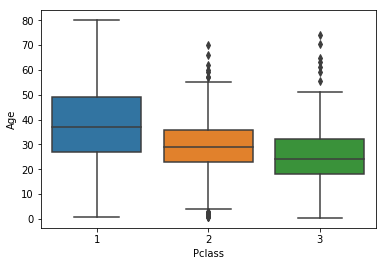

In [83]:
plt.figure()
sns.boxplot(x='Pclass',y='Age',data=ta_train)  # Pclass에 따른 Age 분포

In [84]:
# Pclass에 따른 Age의 중앙값들
combi=[ta_train,ta_test]
l1=[]
for i in combi:
    for j in [1,2,3]:
        l1.append(i[i['Pclass']==j]['Age'].median())
l1

[37.0, 29.0, 24.0, 42.0, 26.5, 24.0]

In [66]:
def go(df):
    Age=df[0]
    Pclass=df[1]
    global l1
    if pd.isna(Age):
        if Pclass==1:
            return l1[0]
        elif Pclass==2:
            return l1[1]
        else:
            return l1[2]
    else:
        return Age

In [85]:
ta_train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [86]:
ta_train['Age']=ta_train[['Age','Pclass']].apply(go,axis=1)
ta_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [68]:
def gogo(df):
    Age=df[0]
    Pclass=df[1]
    global l1
    if pd.isna(Age):
        if Pclass==1:
            return l1[3]
        elif Pclass==2:
            return l1[4]
        else:
            return l1[5]
    else:
        return Age

In [87]:
ta_test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64

In [88]:
ta_test['Age']=ta_test[['Age','Pclass']].apply(gogo,axis=1)
ta_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [75]:
def sex_(df):
    Sex=df
    if Sex=='male':
        return 0
    else:
        return 1

In [89]:
ta_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [90]:
ta_train['Sex']=ta_train['Sex'].apply(sex_)
ta_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [92]:
ta_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [93]:
ta_test['Sex']=ta_test['Sex'].apply(sex_)
ta_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,Q
1,3,1,47.0,1,0,7.0000,S
2,2,0,62.0,0,0,9.6875,Q
3,3,0,27.0,0,0,8.6625,S
4,3,1,22.0,1,1,12.2875,S


In [94]:
def emba_(df):
    Embarked=df
    if Embarked=='S':
        return 0
    elif Embarked=='C':
        return 1
    else:
        return 2

In [95]:
ta_train['Embarked']=ta_train['Embarked'].apply(emba_)
ta_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [96]:
ta_test['Embarked']=ta_test['Embarked'].apply(emba_)
ta_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [97]:
x_train=ta_train.drop('Survived',axis=1)
y_train=ta_train['Survived']
x_test=ta_test.copy()
print(x_train.shape,y_train.shape,x_test.shape)

(891, 7) (891,) (418, 7)


In [98]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
rf.score(x_train,y_train)
arf=round(rf.score(x_train,y_train)*100,2)
arf

98.2

In [102]:
ta_submit['Survived']=y_pred

In [104]:
ta_submit.to_csv('prediction_submission.csv',index=False)

# 다시 처음부터 데이터 전처리 후 xgboost 이용한 모델 만들고 예측 

In [6]:
ta_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
x=ta_train[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [8]:
y=ta_train['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [9]:
x.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
x['Age']=x['Age'].fillna(-1)
x.isna().sum()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [11]:
x['Sex']=x['Sex'].map({'male':0,'female':1})
x['Sex'].head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [12]:
x['Embarked']=x['Embarked'].map({'S':0,'C':1,'Q':2})
x['Embarked'].head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: Embarked, dtype: float64

In [13]:
x['Embarked']=x['Embarked'].fillna(-1)
x.isna().sum()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [14]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0.0
1,1,1,38.0,1,0,71.2833,1.0
2,3,1,26.0,0,0,7.9250,0.0
3,1,1,35.0,1,0,53.1000,0.0
4,3,0,35.0,0,0,8.0500,0.0


In [15]:
ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
x_test=ta_test[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [17]:
x_test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [18]:
x_test['Age']=x_test['Age'].fillna(-1)
x_test.isna().sum()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [19]:
x_test['Sex']=x_test['Sex'].map({'male':0,'female':1})
x_test['Sex'].head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    0
1    1
2    0
3    0
4    1
Name: Sex, dtype: int64

In [20]:
x_test['Embarked']=x_test['Embarked'].map({'S':0,'C':1,'Q':2})
x_test['Embarked'].head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    2
1    0
2    2
3    0
4    0
Name: Embarked, dtype: int64

In [21]:
x_test['Fare']=x_test['Fare'].fillna(-1)
x_test.isna().sum()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [22]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [23]:
xg=xgb.XGBClassifier()
xg=xg.fit(x,y)

In [24]:
ta_test['Survived']=xg.predict_proba(x_test)[:,1]
ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.060529
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.211723
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.042038
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.166165
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.398370


In [63]:
ta_test[['PassengerId','Survived']].to_csv('my_prediction.csv',index=False)

In [26]:
rf=RandomForestClassifier(n_estimators=100)
rf=rf.fit(x,y)

In [27]:
ta_test['Survived']=rf.predict_proba(x_test)[:,1]
ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.080000
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.286667
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.250000
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.700000
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.540000


In [71]:
ta_test[['PassengerId','Survived']].to_csv('my_prediction2.csv',index=False)

# Pclass와 Embarked 더미변수 생성

In [28]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0.0
1,1,1,38.0,1,0,71.2833,1.0
2,3,1,26.0,0,0,7.9250,0.0
3,1,1,35.0,1,0,53.1000,0.0
4,3,0,35.0,0,0,8.0500,0.0


In [29]:
def PP(df):
    Pclass=df
    if Pclass==1:
        return 1
    else:
        return 0

x['Pclass1']=x['Pclass'].apply(PP)
x.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass1
0,3,0,22.0,1,0,7.2500,0.0,0
1,1,1,38.0,1,0,71.2833,1.0,1
2,3,1,26.0,0,0,7.9250,0.0,0
3,1,1,35.0,1,0,53.1000,0.0,1
4,3,0,35.0,0,0,8.0500,0.0,0


In [30]:
def PPP(df):
    Pclass=df
    if Pclass==2:
        return 1
    else:
        return 0

x['Pclass2']=x['Pclass'].apply(PPP)
x.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass1,Pclass2
0,3,0,22.0,1,0,7.2500,0.0,0,0
1,1,1,38.0,1,0,71.2833,1.0,1,0
2,3,1,26.0,0,0,7.9250,0.0,0,0
3,1,1,35.0,1,0,53.1000,0.0,1,0
4,3,0,35.0,0,0,8.0500,0.0,0,0


In [31]:
def PPPP(df):
    Pclass=df
    if Pclass==3:
        return 1
    else:
        return 0

x['Pclass3']=x['Pclass'].apply(PPPP)
x.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass1,Pclass2,Pclass3
0,3,0,22.0,1,0,7.2500,0.0,0,0,1
1,1,1,38.0,1,0,71.2833,1.0,1,0,0
2,3,1,26.0,0,0,7.9250,0.0,0,0,1
3,1,1,35.0,1,0,53.1000,0.0,1,0,0
4,3,0,35.0,0,0,8.0500,0.0,0,0,1


In [32]:
x=x.drop(['Pclass'],axis=1)
x.head()

,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass1,Pclass2,Pclass3
0,0,22.0,1,0,7.2500,0.0,0,0,1
1,1,38.0,1,0,71.2833,1.0,1,0,0
2,1,26.0,0,0,7.9250,0.0,0,0,1
3,1,35.0,1,0,53.1000,0.0,1,0,0
4,0,35.0,0,0,8.0500,0.0,0,0,1


In [33]:
x['Embarked'].value_counts()

 0.0    644
 1.0    168
 2.0     77
-1.0      2
Name: Embarked, dtype: int64

In [34]:
def EE(df):
    Embarked=df
    if Embarked==0:
        return 1
    else:
        return 0

x['Embarked1']=x['Embarked'].apply(EE)
x.head()

,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass1,Pclass2,Pclass3,Embarked1
0,0,22.0,1,0,7.2500,0.0,0,0,1,1
1,1,38.0,1,0,71.2833,1.0,1,0,0,0
2,1,26.0,0,0,7.9250,0.0,0,0,1,1
3,1,35.0,1,0,53.1000,0.0,1,0,0,1
4,0,35.0,0,0,8.0500,0.0,0,0,1,1


In [35]:
def EEE(df):
    Embarked=df
    if Embarked==1:
        return 1
    else:
        return 0

x['Embarked2']=x['Embarked'].apply(EEE)
x.head()

,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2
0,0,22.0,1,0,7.2500,0.0,0,0,1,1,0
1,1,38.0,1,0,71.2833,1.0,1,0,0,0,1
2,1,26.0,0,0,7.9250,0.0,0,0,1,1,0
3,1,35.0,1,0,53.1000,0.0,1,0,0,1,0
4,0,35.0,0,0,8.0500,0.0,0,0,1,1,0


In [36]:
def EEEE(df):
    Embarked=df
    if Embarked==2:
        return 1
    else:
        return 0

x['Embarked3']=x['Embarked'].apply(EEEE)
x.head()

,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3
0,0,22.0,1,0,7.2500,0.0,0,0,1,1,0,0
1,1,38.0,1,0,71.2833,1.0,1,0,0,0,1,0
2,1,26.0,0,0,7.9250,0.0,0,0,1,1,0,0
3,1,35.0,1,0,53.1000,0.0,1,0,0,1,0,0
4,0,35.0,0,0,8.0500,0.0,0,0,1,1,0,0


In [37]:
x=x.drop(['Embarked'],axis=1)
x.head()

,Sex,Age,SibSp,Parch,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3
0,0,22.0,1,0,7.2500,0,0,1,1,0,0
1,1,38.0,1,0,71.2833,1,0,0,0,1,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0
3,1,35.0,1,0,53.1000,1,0,0,1,0,0
4,0,35.0,0,0,8.0500,0,0,1,1,0,0


In [38]:
xg=xgb.XGBClassifier()
xg=xg.fit(x,y)

In [39]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [40]:
x_test['Pclass1']=x_test['Pclass'].apply(PP)
x_test['Pclass2']=x_test['Pclass'].apply(PPP)
x_test['Pclass3']=x_test['Pclass'].apply(PPPP)
x_test=x_test.drop(['Pclass'],axis=1)
x_test.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass1,Pclass2,Pclass3
0,0,34.5,0,0,7.8292,2,0,0,1
1,1,47.0,1,0,7.0000,0,0,0,1
2,0,62.0,0,0,9.6875,2,0,1,0
3,0,27.0,0,0,8.6625,0,0,0,1
4,1,22.0,1,1,12.2875,0,0,0,1


In [41]:
x_test['Embarked1']=x_test['Embarked'].apply(EE)
x_test['Embarked2']=x_test['Embarked'].apply(EEE)
x_test['Embarked3']=x_test['Embarked'].apply(EEEE)
x_test=x_test.drop(['Embarked'],axis=1)
x_test.head()

,Sex,Age,SibSp,Parch,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3
0,0,34.5,0,0,7.8292,0,0,1,0,0,1
1,1,47.0,1,0,7.0000,0,0,1,1,0,0
2,0,62.0,0,0,9.6875,0,1,0,0,0,1
3,0,27.0,0,0,8.6625,0,0,1,1,0,0
4,1,22.0,1,1,12.2875,0,0,1,1,0,0


In [42]:
ta_test['Survived']=xg.predict_proba(x_test)[:,1]
ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.068086
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.205308
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.048983
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.147164
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.391776


In [93]:
ta_test[['PassengerId','Survived']].to_csv('my_prediction4.csv',index=False)

In [45]:
def eng(df):
    if df==0:
        return 0
    else:
        return 1

In [46]:
x2=x.copy()
x2.head()

,Sex,Age,SibSp,Parch,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3
0,0,22.0,1,0,7.2500,0,0,1,1,0,0
1,1,38.0,1,0,71.2833,1,0,0,0,1,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0
3,1,35.0,1,0,53.1000,1,0,0,1,0,0
4,0,35.0,0,0,8.0500,0,0,1,1,0,0


In [47]:
x_test2=x_test.copy()
x_test2.head()

,Sex,Age,SibSp,Parch,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3
0,0,34.5,0,0,7.8292,0,0,1,0,0,1
1,1,47.0,1,0,7.0000,0,0,1,1,0,0
2,0,62.0,0,0,9.6875,0,1,0,0,0,1
3,0,27.0,0,0,8.6625,0,0,1,1,0,0
4,1,22.0,1,1,12.2875,0,0,1,1,0,0


In [ ]:
# 가족 있다없다 했다가 삭제함

# Cabin 있다없다 넣음

In [48]:
ta_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [49]:
ta_train[['Cabin','Survived']].groupby('Cabin')['Survived'].sum().sum()

136

In [50]:
x2['Cabin']=ta_train['Cabin']
x2.head()

,Sex,Age,SibSp,Parch,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin
0,0,22.0,1,0,7.2500,0,0,1,1,0,0,NaN
1,1,38.0,1,0,71.2833,1,0,0,0,1,0,C85
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,NaN
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,C123
4,0,35.0,0,0,8.0500,0,0,1,1,0,0,NaN


In [51]:
x_test2['Cabin']=ta_test['Cabin']
x_test2.head()

,Sex,Age,SibSp,Parch,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin
0,0,34.5,0,0,7.8292,0,0,1,0,0,1,NaN
1,1,47.0,1,0,7.0000,0,0,1,1,0,0,NaN
2,0,62.0,0,0,9.6875,0,1,0,0,0,1,NaN
3,0,27.0,0,0,8.6625,0,0,1,1,0,0,NaN
4,1,22.0,1,1,12.2875,0,0,1,1,0,0,NaN


In [52]:
def cab(df):
    if type(df)==float:
        return 0
    else:
        return 1

In [53]:
type(x2['Cabin'][0])

float

In [54]:
x2['Cabin']=x2['Cabin'].apply(cab)
x2.head()

,Sex,Age,SibSp,Parch,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin
0,0,22.0,1,0,7.2500,0,0,1,1,0,0,0
1,1,38.0,1,0,71.2833,1,0,0,0,1,0,1
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,1,0,0,0


In [55]:
x_test2['Cabin']=x_test2['Cabin'].apply(cab)
x_test2.head(15)

,Sex,Age,SibSp,Parch,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin
0,0,34.5,0,0,7.8292,0,0,1,0,0,1,0
1,1,47.0,1,0,7.0000,0,0,1,1,0,0,0
2,0,62.0,0,0,9.6875,0,1,0,0,0,1,0
3,0,27.0,0,0,8.6625,0,0,1,1,0,0,0
4,1,22.0,1,1,12.2875,0,0,1,1,0,0,0
5,0,14.0,0,0,9.2250,0,0,1,1,0,0,0
6,1,30.0,0,0,7.6292,0,0,1,0,0,1,0
7,0,26.0,1,1,29.0000,0,1,0,1,0,0,0
8,1,18.0,0,0,7.2292,0,0,1,0,1,0,0
9,0,21.0,2,0,24.1500,0,0,1,1,0,0,0


In [56]:
xg2=xgb.XGBClassifier()
xg2=xg2.fit(x2,y)

In [57]:
ta_test['Survived']=xg2.predict_proba(x_test2)[:,1]
ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.064449
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.233371
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.055382
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.155122
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.436522


In [164]:
ta_test[['PassengerId','Survived']].to_csv('my_prediction6.csv',index=False)

# 성능(점수?) 높이기위한 발악

In [80]:
# x3=x2.copy()
# x3.head()

,Sex,Age,SibSp,Parch,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin
0,0,22.0,1,0,7.2500,0,0,1,1,0,0,0
1,1,38.0,1,0,71.2833,1,0,0,0,1,0,1
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,1,0,0,0


In [81]:
# x_test3=x_test2.copy()
# x_test3.head()

,Sex,Age,SibSp,Parch,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin
0,0,34.5,0,0,7.8292,0,0,1,0,0,1,0
1,1,47.0,1,0,7.0000,0,0,1,1,0,0,0
2,0,62.0,0,0,9.6875,0,1,0,0,0,1,0
3,0,27.0,0,0,8.6625,0,0,1,1,0,0,0
4,1,22.0,1,1,12.2875,0,0,1,1,0,0,0


In [63]:
# x3.shape

(891, 12)

In [60]:
# x['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [61]:
# x['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [62]:
# (x['SibSp']+x['Parch']).value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


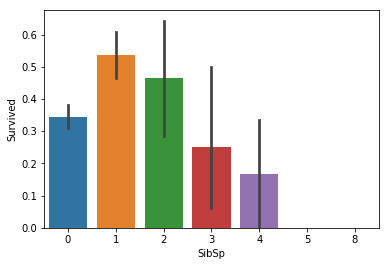

In [64]:
# plt.figure()
# sns.barplot(x='SibSp',y='Survived',data=ta_train)

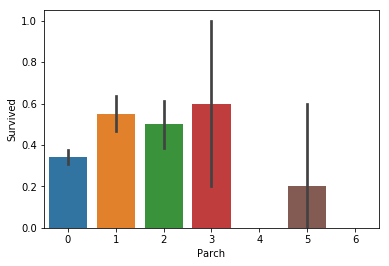

In [65]:
# plt.figure()
# sns.barplot(x='Parch',y='Survived',data=ta_train)

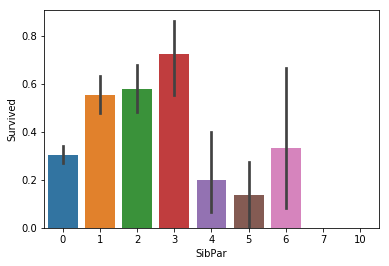

In [67]:
t2=ta_train.copy()
t2['SibPar']=t2['SibSp']+t2['Parch']
plt.figure()
sns.barplot(x='SibPar',y='Survived',data=t2)

In [83]:
# x3['SibPar']=x3['SibSp']+x3['Parch']
# x3=x3.drop(['SibSp','Parch'],axis=1)
# x3.head()

,Sex,Age,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,SibPar
0,0,22.0,7.2500,0,0,1,1,0,0,0,1
1,1,38.0,71.2833,1,0,0,0,1,0,1,1
2,1,26.0,7.9250,0,0,1,1,0,0,0,0
3,1,35.0,53.1000,1,0,0,1,0,0,1,1
4,0,35.0,8.0500,0,0,1,1,0,0,0,0


In [85]:
# x_test3['SibPar']=x_test3['SibSp']+x_test3['Parch']
# x_test3=x_test3.drop(['SibSp','Parch'],axis=1)
# x_test3.head()

,Sex,Age,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,SibPar
0,0,34.5,7.8292,0,0,1,0,0,1,0,0
1,1,47.0,7.0000,0,0,1,1,0,0,0,1
2,0,62.0,9.6875,0,1,0,0,0,1,0,0
3,0,27.0,8.6625,0,0,1,1,0,0,0,0
4,1,22.0,12.2875,0,0,1,1,0,0,0,2


In [86]:
# SP_dummy=pd.get_dummies(x3['SibPar'])
# SP_dummy.head()

,0,1,2,3,4,5,6,7,10
0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0


In [87]:
# SP_dummy2=pd.get_dummies(x_test3['SibPar'])
# SP_dummy2.head()

,0,1,2,3,4,5,6,7,10
0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0


In [89]:
# x3=x3.join(SP_dummy.add_prefix('SibPar'))
# x3=x3.drop(['SibPar'],axis=1)
# x3.head()

,Sex,Age,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,SibPar0,SibPar1,SibPar2,SibPar3,SibPar4,SibPar5,SibPar6,SibPar7,SibPar10
0,0,22.0,7.2500,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0
1,1,38.0,71.2833,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0
2,1,26.0,7.9250,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0
3,1,35.0,53.1000,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
4,0,35.0,8.0500,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0


In [91]:
# x_test3=x_test3.join(SP_dummy2.add_prefix('SibPar'))
# x_test3=x_test3.drop(['SibPar'],axis=1)
# x_test3.head()

,Sex,Age,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,SibPar0,SibPar1,SibPar2,SibPar3,SibPar4,SibPar5,SibPar6,SibPar7,SibPar10
0,0,34.5,7.8292,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0
1,1,47.0,7.0000,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,62.0,9.6875,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,0,27.0,8.6625,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0
4,1,22.0,12.2875,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0


In [92]:
# xg3=xgb.XGBClassifier()
# xg3=xg3.fit(x3,y)

In [93]:
# ta_test['Survived']=xg3.predict_proba(x_test3)[:,1]
# ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.082591
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.303713
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.073002
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.128354
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.425207


In [94]:
# ta_test[['PassengerId','Survived']].to_csv('my_prediction7.csv',index=False)
# 낮아짐

In [101]:
# ta_test['Parch'].value_counts()

0    324
1     52
2     33
3      3
9      2
4      2
6      1
5      1
Name: Parch, dtype: int64

In [99]:
# ta_test[ta_test['Parch']==9]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
342,1234,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S,0.087669
365,1257,3,"Sage, Mrs. John (Annie Bullen)",female,NaN,1,9,CA. 2343,69.55,NaN,S,0.129926


In [102]:
# x4=x2.copy()
# x_test4=x_test2.copy()

In [108]:
# Sib_dummy=pd.get_dummies(x4['SibSp'])
# Sib_dummy.head()

,0,1,2,3,4,5,8
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0


In [109]:
# Par_dummy=pd.get_dummies(x4['Parch'])
# Par_dummy.head()

,0,1,2,3,4,5,6
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [110]:
# Sib_dummy2=pd.get_dummies(x_test4['SibSp'])
# Sib_dummy2.head()

,0,1,2,3,4,5,8
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0


In [111]:
# Par_dummy2=pd.get_dummies(x_test4['Parch'])
# Par_dummy2.head()

,0,1,2,3,4,5,6,9
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0


In [113]:
# x4=x4.join(Sib_dummy.add_prefix('SibSp'))
# x4=x4.drop(['SibSp'],axis=1)
# x4.head()

,Sex,Age,Parch,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,SibSp0,SibSp1,SibSp2,SibSp3,SibSp4,SibSp5,SibSp8
0,0,22.0,0,7.2500,0,0,1,1,0,0,0,0,1,0,0,0,0,0
1,1,38.0,0,71.2833,1,0,0,0,1,0,1,0,1,0,0,0,0,0
2,1,26.0,0,7.9250,0,0,1,1,0,0,0,1,0,0,0,0,0,0
3,1,35.0,0,53.1000,1,0,0,1,0,0,1,0,1,0,0,0,0,0
4,0,35.0,0,8.0500,0,0,1,1,0,0,0,1,0,0,0,0,0,0


In [116]:
# x4=x4.join(Par_dummy.add_prefix('Parch'))
# x4=x4.drop(['Parch'],axis=1)
# x4['Parch9']=0
# x4.head()

,Sex,Age,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,...,SibSp5,SibSp8,Parch0,Parch1,Parch2,Parch3,Parch4,Parch5,Parch6,Parch9
0,0,22.0,7.2500,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,38.0,71.2833,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2,1,26.0,7.9250,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,35.0,8.0500,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [118]:
# x_test4=x_test4.join(Sib_dummy2.add_prefix('SibSp'))
# x_test4=x_test4.drop(['SibSp'],axis=1)
# x_test4.head()

,Sex,Age,Parch,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,SibSp0,SibSp1,SibSp2,SibSp3,SibSp4,SibSp5,SibSp8
0,0,34.5,0,7.8292,0,0,1,0,0,1,0,1,0,0,0,0,0,0
1,1,47.0,0,7.0000,0,0,1,1,0,0,0,0,1,0,0,0,0,0
2,0,62.0,0,9.6875,0,1,0,0,0,1,0,1,0,0,0,0,0,0
3,0,27.0,0,8.6625,0,0,1,1,0,0,0,1,0,0,0,0,0,0
4,1,22.0,1,12.2875,0,0,1,1,0,0,0,0,1,0,0,0,0,0


In [120]:
# x_test4=x_test4.join(Par_dummy2.add_prefix('Parch'))
# x_test4=x_test4.drop(['Parch'],axis=1)
# x_test4.head()

,Sex,Age,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,...,SibSp5,SibSp8,Parch0,Parch1,Parch2,Parch3,Parch4,Parch5,Parch6,Parch9
0,0,34.5,7.8292,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,1,47.0,7.0000,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,62.0,9.6875,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,27.0,8.6625,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,22.0,12.2875,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [121]:
# xg4=xgb.XGBClassifier()
# xg4=xg4.fit(x4,y)

In [122]:
# ta_test['Survived']=xg4.predict_proba(x_test4)[:,1]
# ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.088278
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.219688
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.090210
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.170765
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.399863


In [123]:
# ta_test[['PassengerId','Survived']].to_csv('my_prediction8.csv',index=False)
# 더낮아짐;;

# x2로 갑니다

In [140]:
xg2=xgb.XGBClassifier()
xg2=xg2.fit(x2,y)

In [142]:
ta_test['Survived1']=xg2.predict_proba(x_test2)[:,1]
ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Survived1,Survived2
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.064449,0.064449,0.02
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.233371,0.233371,0.30
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.055382,0.055382,0.30
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.155122,0.155122,0.64
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.436522,0.436522,0.54


In [174]:
# rf2=RandomForestClassifier(n_estimators=50)
# rf2=rf2.fit(x2,y)

In [175]:
# ta_test['Survived1']=rf2.predict_proba(x_test2)[:,1]
# ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Survived1,knn
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.02,0.064449,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.30,0.233371,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.28,0.055382,0.4
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.64,0.155122,0.6
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.56,0.436522,0.0


In [147]:
# ta_test['Survived']=ta_test['Survived1']*0.7 + ta_test['Survived2']*0.3
# ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Survived1,Survived2
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.069115,0.064449,0.08
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.262360,0.233371,0.33
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.128768,0.055382,0.30
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.294585,0.155122,0.62
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.443565,0.436522,0.46


In [148]:
# ta_test[['PassengerId','Survived']].to_csv('my_prediction10.csv',index=False)
# 낮음

In [150]:
import lightgbm as lgb

In [151]:
# lgbm=lgb.LGBMClassifier()
# lgbm=lgbm.fit(x2,y)

In [152]:
# ta_test['Survived3']=lgbm.predict_proba(x_test2)[:,1]
# ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Survived1,Survived2,Survived3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.069115,0.064449,0.08,0.015846
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.262360,0.233371,0.33,0.117988
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.128768,0.055382,0.30,0.148705
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.294585,0.155122,0.62,0.509904
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.443565,0.436522,0.46,0.493639


In [153]:
# ta_test['Survived']=ta_test['Survived3']
# ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Survived1,Survived2,Survived3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.015846,0.064449,0.08,0.015846
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.117988,0.233371,0.33,0.117988
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.148705,0.055382,0.30,0.148705
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.509904,0.155122,0.62,0.509904
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.493639,0.436522,0.46,0.493639


In [154]:
# ta_test[['PassengerId','Survived']].to_csv('my_prediction11.csv',index=False)
# 낮음

In [155]:
# ta_test['Survived']=(ta_test['Survived1']+ta_test['Survived2']+ta_test['Survived3'])/3
# ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Survived1,Survived2,Survived3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.053432,0.064449,0.08,0.015846
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.227120,0.233371,0.33,0.117988
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.168029,0.055382,0.30,0.148705
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.428342,0.155122,0.62,0.509904
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.463387,0.436522,0.46,0.493639


In [156]:
# ta_test[['PassengerId','Survived']].to_csv('my_prediction12.csv',index=False)
# 낮음

In [157]:
# lgbm4=lgb.LGBMClassifier()
# lgbm4=lgbm4.fit(x4,y)

In [158]:
# ta_test['Survived']=lgbm4.predict_proba(x_test4)[:,1]
# ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Survived1,Survived2,Survived3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.020756,0.064449,0.08,0.015846
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.151780,0.233371,0.33,0.117988
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.159783,0.055382,0.30,0.148705
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.504753,0.155122,0.62,0.509904
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.532786,0.436522,0.46,0.493639


In [164]:
# ta_test[['PassengerId','Survived']].to_csv('my_prediction13.csv',index=False)

In [166]:
# from sklearn.neighbors import KNeighborsClassifier

In [167]:
# ta_test=ta_test.drop(['Survived2','Survived3'],axis=1)
# ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Survived1
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.020756,0.064449
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.151780,0.233371
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.159783,0.055382
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.504753,0.155122
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.532786,0.436522


In [168]:
# knn=KNeighborsClassifier()
# knn=knn.fit(x2,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [169]:
# ta_test['knn']=knn.predict_proba(x_test2)[:,1]
# ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Survived1,knn
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.020756,0.064449,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.151780,0.233371,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.159783,0.055382,0.4
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.504753,0.155122,0.6
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.532786,0.436522,0.0


In [172]:
# ta_test['Survived']=ta_test['knn']
# ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Survived1,knn
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0,0.064449,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.0,0.233371,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.4,0.055382,0.4
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.6,0.155122,0.6
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.0,0.436522,0.0


In [173]:
# ta_test[['PassengerId','Survived']].to_csv('my_prediction14.csv',index=False)

In [176]:
# ta_test=ta_test.drop(['knn'],axis=1)
# ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Survived1
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.02,0.064449
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.30,0.233371
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.28,0.055382
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.64,0.155122
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.56,0.436522


In [177]:
from sklearn.tree import DecisionTreeClassifier

In [182]:
dtr=DecisionTreeClassifier(max_depth=3)
dtr=dtr.fit(x2,y)

In [183]:
ta_test['tree']=dtr.predict_proba(x_test2)[:,1]
ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Survived1,tree
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.02,0.064449,0.118812
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.30,0.233371,0.589744
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.28,0.055382,0.118812
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.64,0.155122,0.118812
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.56,0.436522,0.589744


In [184]:
# ta_test['Survived']=ta_test['tree']
# ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Survived1,tree
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.118812,0.064449,0.118812
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.589744,0.233371,0.589744
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.118812,0.055382,0.118812
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.118812,0.155122,0.118812
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.589744,0.436522,0.589744


In [185]:
# ta_test[['PassengerId','Survived']].to_csv('my_prediction15.csv',index=False)

In [186]:
ta_test['Survived']=ta_test['Survived1']*0.9 + ta_test['tree']*0.1
ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Survived1,tree
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.069886,0.064449,0.118812
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.269009,0.233371,0.589744
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.061725,0.055382,0.118812
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.151491,0.155122,0.118812
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.451844,0.436522,0.589744


In [187]:
ta_test[['PassengerId','Survived']].to_csv('my_prediction16.csv',index=False)

In [ ]:
import lightgbm as lgb

In [188]:
lgbm=lgb.LGBMClassifier()
lgbm=lgbm.fit(x2,y)

In [189]:
ta_test['lgbm']=lgbm.predict_proba(x_test2)[:,1]
ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Survived1,tree,lgbm
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.069886,0.064449,0.118812,0.015846
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.269009,0.233371,0.589744,0.117988
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.061725,0.055382,0.118812,0.148705
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.151491,0.155122,0.118812,0.509904
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.451844,0.436522,0.589744,0.493639


In [190]:
ta_test['Survived']=ta_test['Survived1']*0.85 + ta_test['tree']*0.1 + ta_test['lgbm']*0.05
ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Survived1,tree,lgbm
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.067456,0.064449,0.118812,0.015846
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.263239,0.233371,0.589744,0.117988
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.066391,0.055382,0.118812,0.148705
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.169230,0.155122,0.118812,0.509904
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.454700,0.436522,0.589744,0.493639


In [191]:
ta_test[['PassengerId','Survived']].to_csv('my_prediction17.csv',index=False)

# age와 fare에 대한 고찰

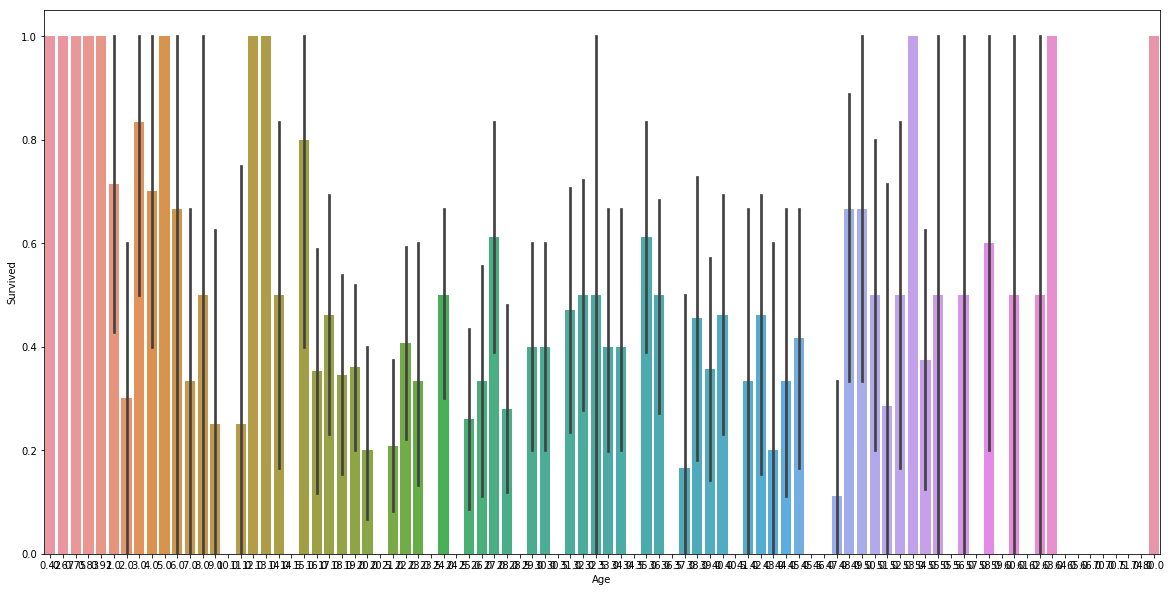

In [201]:
plt.figure(figsize=[20,10])
sns.barplot(x='Age',y='Survived',data=ta_train)

In [227]:
xt=ta_train[ta_train['Age'].isna()==True]
xt['Survived'].value_counts()

0    125
1     52
Name: Survived, dtype: int64

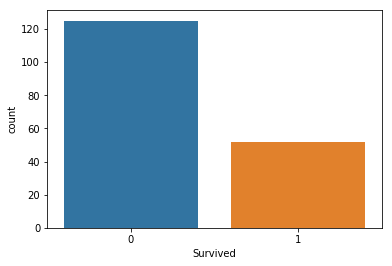

In [228]:
sns.countplot('Survived',data=xt)

In [240]:
tt0=ta_train[ta_train['Survived']==0]
tt1=ta_train[ta_train['Survived']==1]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


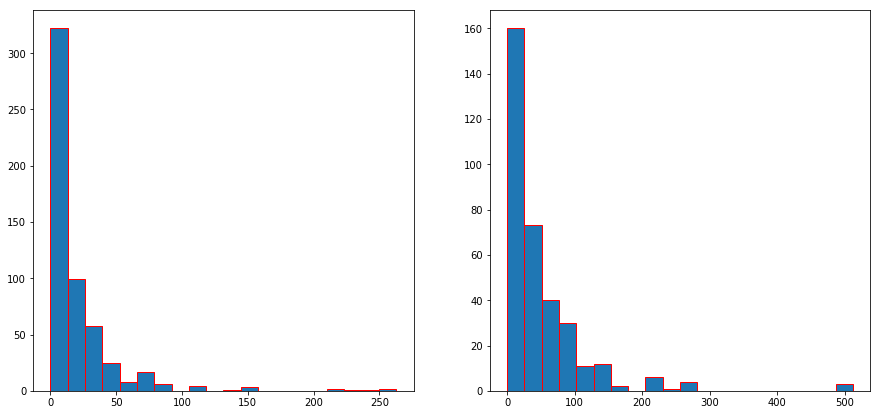

In [244]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].hist(tt0['Fare'],bins=20,edgecolor='r')
ax[1].hist(tt1['Fare'],bins=20,edgecolor='r')
fig.show()

In [247]:
ta_train[['Survived','Fare']].groupby('Survived').median()

,Fare
Survived,
0,10.5
1,26.0


In [249]:
from sklearn.linear_model import LogisticRegression

In [250]:
lr=LogisticRegression()
lr=lr.fit(x2,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [251]:
ta_test['lr']=lr.predict_proba(x_test2)[:,1]
ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Survived1,tree,lgbm,lr
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.067456,0.064449,0.118812,0.015846,0.091175
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.263239,0.233371,0.589744,0.117988,0.417117
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.066391,0.055382,0.118812,0.148705,0.165551
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.169230,0.155122,0.118812,0.509904,0.088542
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.454700,0.436522,0.589744,0.493639,0.509144


In [252]:
ta_test['Survived']=ta_test['lr']

In [253]:
ta_test[['PassengerId','Survived']].to_csv('my_prediction18.csv',index=False)

In [265]:
ta_test['Survived']=ta_test['Survived1']*0.6 + ta_test['tree']*0.15 + ta_test['lgbm']*0.1 + ta_test['lr']*0.15
ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Survived1,tree,lgbm,lr
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.071752,0.064449,0.118812,0.015846,0.091175
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.302851,0.233371,0.589744,0.117988,0.417117
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.090754,0.055382,0.118812,0.148705,0.165551
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.175167,0.155122,0.118812,0.509904,0.088542
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.476110,0.436522,0.589744,0.493639,0.509144


In [266]:
ta_test[['PassengerId','Survived']].to_csv('my_prediction24.csv',index=False)

In [291]:
from sklearn.ensemble import RandomForestClassifier

In [292]:
rf=RandomForestClassifier(max_depth=4,max_features=5,n_estimators=1000)
rf=rf.fit(x2,y)

In [293]:
ta_test['rf']=rf.predict_proba(x_test2)[:,1]
ta_test['Survived']=ta_test['rf']
ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Survived1,tree,lgbm,lr,rf
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.109406,0.064449,0.118812,0.015846,0.091175,0.109406
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.431612,0.233371,0.589744,0.117988,0.417117,0.431612
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.136264,0.055382,0.118812,0.148705,0.165551,0.136264
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.131724,0.155122,0.118812,0.509904,0.088542,0.131724
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.497486,0.436522,0.589744,0.493639,0.509144,0.497486


In [294]:
ta_test[['PassengerId','Survived']].to_csv('my_prediction25.csv',index=False)

# 그래프 보고 패턴있는 것 같은 나이대 범주화

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


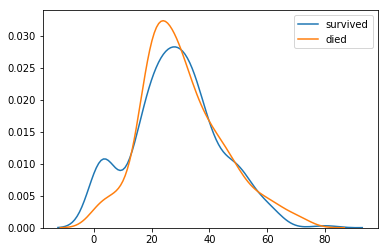

In [303]:
sns.kdeplot(ta_train.loc[ta_train['Survived']==1,'Age'],label='survived')
sns.kdeplot(ta_train.loc[ta_train['Survived']==0,'Age'],label='died')

In [328]:
x5=x2.copy()
x_test5=x_test2.copy()

In [329]:
x5.head()

,Sex,Age,SibSp,Parch,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin
0,0,22.0,1,0,7.2500,0,0,1,1,0,0,0
1,1,38.0,1,0,71.2833,1,0,0,0,1,0,1
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,1,0,0,0


In [330]:
x5['Age1']=((x5['Age']<=10)&(x5['Age']>=0)).astype(int)
x5.head()

,Sex,Age,SibSp,Parch,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,Age1
0,0,22.0,1,0,7.2500,0,0,1,1,0,0,0,0
1,1,38.0,1,0,71.2833,1,0,0,0,1,0,1,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,0
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,1,0
4,0,35.0,0,0,8.0500,0,0,1,1,0,0,0,0


In [331]:
x_test5['Age1']=((x_test5['Age']<=10)&(x_test5['Age']>=0)).astype(int)
x_test5.head()

,Sex,Age,SibSp,Parch,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,Age1
0,0,34.5,0,0,7.8292,0,0,1,0,0,1,0,0
1,1,47.0,1,0,7.0000,0,0,1,1,0,0,0,0
2,0,62.0,0,0,9.6875,0,1,0,0,0,1,0,0
3,0,27.0,0,0,8.6625,0,0,1,1,0,0,0,0
4,1,22.0,1,1,12.2875,0,0,1,1,0,0,0,0


In [332]:
x5['Age2']=((x5['Age']<=30)&(x5['Age']>=11)).astype(int)
x5.head()

,Sex,Age,SibSp,Parch,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,Age1,Age2
0,0,22.0,1,0,7.2500,0,0,1,1,0,0,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,1,0,0
4,0,35.0,0,0,8.0500,0,0,1,1,0,0,0,0,0


In [333]:
x_test5['Age2']=((x_test5['Age']<=30)&(x_test5['Age']>=11)).astype(int)
x_test5.head()

,Sex,Age,SibSp,Parch,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,Age1,Age2
0,0,34.5,0,0,7.8292,0,0,1,0,0,1,0,0,0
1,1,47.0,1,0,7.0000,0,0,1,1,0,0,0,0,0
2,0,62.0,0,0,9.6875,0,1,0,0,0,1,0,0,0
3,0,27.0,0,0,8.6625,0,0,1,1,0,0,0,0,1
4,1,22.0,1,1,12.2875,0,0,1,1,0,0,0,0,1


In [334]:
x5['Age3']=((x5['Age']<=57)&(x5['Age']>=31)).astype(int)
x5.head()

,Sex,Age,SibSp,Parch,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,Age1,Age2,Age3
0,0,22.0,1,0,7.2500,0,0,1,1,0,0,0,0,1,0
1,1,38.0,1,0,71.2833,1,0,0,0,1,0,1,0,0,1
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,0,1,0
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,1,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,1,0,0,0,0,0,1


In [335]:
x_test5['Age3']=((x_test5['Age']<=57)&(x_test5['Age']>=31)).astype(int)
x_test5.head()

,Sex,Age,SibSp,Parch,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,Age1,Age2,Age3
0,0,34.5,0,0,7.8292,0,0,1,0,0,1,0,0,0,1
1,1,47.0,1,0,7.0000,0,0,1,1,0,0,0,0,0,1
2,0,62.0,0,0,9.6875,0,1,0,0,0,1,0,0,0,0
3,0,27.0,0,0,8.6625,0,0,1,1,0,0,0,0,1,0
4,1,22.0,1,1,12.2875,0,0,1,1,0,0,0,0,1,0


In [336]:
x5['Age4']=(x5['Age']>=58).astype(int)
x5.head()

,Sex,Age,SibSp,Parch,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,Age1,Age2,Age3,Age4
0,0,22.0,1,0,7.2500,0,0,1,1,0,0,0,0,1,0,0
1,1,38.0,1,0,71.2833,1,0,0,0,1,0,1,0,0,1,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,0,1,0,0
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,1,0,0,1,0
4,0,35.0,0,0,8.0500,0,0,1,1,0,0,0,0,0,1,0


In [337]:
x_test5['Age4']=(x_test5['Age']>=58).astype(int)
x_test5.head()

,Sex,Age,SibSp,Parch,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,Age1,Age2,Age3,Age4
0,0,34.5,0,0,7.8292,0,0,1,0,0,1,0,0,0,1,0
1,1,47.0,1,0,7.0000,0,0,1,1,0,0,0,0,0,1,0
2,0,62.0,0,0,9.6875,0,1,0,0,0,1,0,0,0,0,1
3,0,27.0,0,0,8.6625,0,0,1,1,0,0,0,0,1,0,0
4,1,22.0,1,1,12.2875,0,0,1,1,0,0,0,0,1,0,0


In [338]:
x5['Age5']=(x5['Age']==-1).astype(int)
x5.head()

,Sex,Age,SibSp,Parch,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,Age1,Age2,Age3,Age4,Age5
0,0,22.0,1,0,7.2500,0,0,1,1,0,0,0,0,1,0,0,0
1,1,38.0,1,0,71.2833,1,0,0,0,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,0,1,0,0,0
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,1,0,0,1,0,0
4,0,35.0,0,0,8.0500,0,0,1,1,0,0,0,0,0,1,0,0


In [339]:
x_test5['Age5']=(x_test5['Age']==-1).astype(int)
x_test5.head()

,Sex,Age,SibSp,Parch,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,Age1,Age2,Age3,Age4,Age5
0,0,34.5,0,0,7.8292,0,0,1,0,0,1,0,0,0,1,0,0
1,1,47.0,1,0,7.0000,0,0,1,1,0,0,0,0,0,1,0,0
2,0,62.0,0,0,9.6875,0,1,0,0,0,1,0,0,0,0,1,0
3,0,27.0,0,0,8.6625,0,0,1,1,0,0,0,0,1,0,0,0
4,1,22.0,1,1,12.2875,0,0,1,1,0,0,0,0,1,0,0,0


In [340]:
x5=x5.drop(['Age'],axis=1)
x5.head()

,Sex,SibSp,Parch,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,Age1,Age2,Age3,Age4,Age5
0,0,1,0,7.2500,0,0,1,1,0,0,0,0,1,0,0,0
1,1,1,0,71.2833,1,0,0,0,1,0,1,0,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,0,1,0,0,0
3,1,1,0,53.1000,1,0,0,1,0,0,1,0,0,1,0,0
4,0,0,0,8.0500,0,0,1,1,0,0,0,0,0,1,0,0


In [341]:
x_test5=x_test5.drop(['Age'],axis=1)
x_test5.head()

,Sex,SibSp,Parch,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,Age1,Age2,Age3,Age4,Age5
0,0,0,0,7.8292,0,0,1,0,0,1,0,0,0,1,0,0
1,1,1,0,7.0000,0,0,1,1,0,0,0,0,0,1,0,0
2,0,0,0,9.6875,0,1,0,0,0,1,0,0,0,0,1,0
3,0,0,0,8.6625,0,0,1,1,0,0,0,0,1,0,0,0
4,1,1,1,12.2875,0,0,1,1,0,0,0,0,1,0,0,0


In [342]:
xg5=xgb.XGBClassifier()
xg5=xg5.fit(x5,y)

In [343]:
ta_test['xg5']=xg5.predict_proba(x_test5)[:,1]
ta_test['Survived']=ta_test['xg5']
ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Survived1,tree,lgbm,lr,rf,xg5
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.079291,0.064449,0.118812,0.015846,0.091175,0.109406,0.079291
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.380656,0.233371,0.589744,0.117988,0.417117,0.431612,0.380656
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.104349,0.055382,0.118812,0.148705,0.165551,0.136264,0.104349
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.106107,0.155122,0.118812,0.509904,0.088542,0.131724,0.106107
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.497442,0.436522,0.589744,0.493639,0.509144,0.497486,0.497442


In [344]:
ta_test[['PassengerId','Survived']].to_csv('my_prediction27.csv',index=False)

# 다시한번 패밀리사이즈 (실패)

In [345]:
# x6=x5.copy()
# x_test6=x_test5.copy()
# x6.head()

,Sex,SibSp,Parch,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,Age1,Age2,Age3,Age4,Age5
0,0,1,0,7.2500,0,0,1,1,0,0,0,0,1,0,0,0
1,1,1,0,71.2833,1,0,0,0,1,0,1,0,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,0,1,0,0,0
3,1,1,0,53.1000,1,0,0,1,0,0,1,0,0,1,0,0
4,0,0,0,8.0500,0,0,1,1,0,0,0,0,0,1,0,0


In [346]:
# x6['fam']=x6['SibSp']+x6['Parch']+1
# x_test6['fam']=x_test6['SibSp']+x_test6['Parch']+1
# x6.head()

,Sex,SibSp,Parch,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,Age1,Age2,Age3,Age4,Age5,fam
0,0,1,0,7.2500,0,0,1,1,0,0,0,0,1,0,0,0,2
1,1,1,0,71.2833,1,0,0,0,1,0,1,0,0,1,0,0,2
2,1,0,0,7.9250,0,0,1,1,0,0,0,0,1,0,0,0,1
3,1,1,0,53.1000,1,0,0,1,0,0,1,0,0,1,0,0,2
4,0,0,0,8.0500,0,0,1,1,0,0,0,0,0,1,0,0,1


In [347]:
# x6=x6.drop(['SibSp','Parch'],axis=1)
# x_test6=x_test6.drop(['SibSp','Parch'],axis=1)
# x6.head()

,Sex,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,Age1,Age2,Age3,Age4,Age5,fam
0,0,7.2500,0,0,1,1,0,0,0,0,1,0,0,0,2
1,1,71.2833,1,0,0,0,1,0,1,0,0,1,0,0,2
2,1,7.9250,0,0,1,1,0,0,0,0,1,0,0,0,1
3,1,53.1000,1,0,0,1,0,0,1,0,0,1,0,0,2
4,0,8.0500,0,0,1,1,0,0,0,0,0,1,0,0,1


In [348]:
# xg6=xgb.XGBClassifier()
# xg6=xg6.fit(x6,y)

In [349]:
# ta_test['xg6']=xg6.predict_proba(x_test6)[:,1]
# ta_test['Survived']=ta_test['xg6']
# ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Survived1,tree,lgbm,lr,rf,xg5,xg6
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.085919,0.064449,0.118812,0.015846,0.091175,0.109406,0.079291,0.085919
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.394178,0.233371,0.589744,0.117988,0.417117,0.431612,0.380656,0.394178
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.120413,0.055382,0.118812,0.148705,0.165551,0.136264,0.104349,0.120413
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.109189,0.155122,0.118812,0.509904,0.088542,0.131724,0.106107,0.109189
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.463904,0.436522,0.589744,0.493639,0.509144,0.497486,0.497442,0.463904


In [350]:
# ta_test[['PassengerId','Survived']].to_csv('my_prediction28.csv',index=False)

In [351]:
# fam_dummy=pd.get_dummies(x6['fam'])
# fam_dummy.head()

,1,2,3,4,5,6,7,8,11
0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0


In [352]:
# x6=x6.join(fam_dummy.add_prefix('fam'))
# x6=x6.drop(['fam'],axis=1)
# x6.head()

,Sex,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,Age1,...,Age5,fam1,fam2,fam3,fam4,fam5,fam6,fam7,fam8,fam11
0,0,7.2500,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,71.2833,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,1,7.9250,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,53.1000,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,8.0500,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [353]:
# fam_dummy2=pd.get_dummies(x_test6['fam'])
# fam_dummy2.head()

,1,2,3,4,5,6,7,8,11
0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0


In [354]:
# x_test6=x_test6.join(fam_dummy2.add_prefix('fam'))
# x_test6=x_test6.drop(['fam'],axis=1)
# x_test6.head()

,Sex,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,Age1,...,Age5,fam1,fam2,fam3,fam4,fam5,fam6,fam7,fam8,fam11
0,0,7.8292,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,7.0000,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,9.6875,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,8.6625,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,12.2875,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [355]:
# xg6=xgb.XGBClassifier()
# xg6=xg6.fit(x6,y)

In [356]:
# ta_test['xg6']=xg6.predict_proba(x_test6)[:,1]
# ta_test['Survived']=ta_test['xg6']
# ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Survived1,tree,lgbm,lr,rf,xg5,xg6
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.063016,0.064449,0.118812,0.015846,0.091175,0.109406,0.079291,0.063016
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.323885,0.233371,0.589744,0.117988,0.417117,0.431612,0.380656,0.323885
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.143630,0.055382,0.118812,0.148705,0.165551,0.136264,0.104349,0.143630
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.103111,0.155122,0.118812,0.509904,0.088542,0.131724,0.106107,0.103111
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.468322,0.436522,0.589744,0.493639,0.509144,0.497486,0.497442,0.468322


In [357]:
# ta_test[['PassengerId','Survived']].to_csv('my_prediction29.csv',index=False)

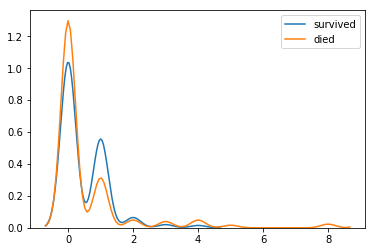

In [358]:
sns.kdeplot(ta_train.loc[ta_train['Survived']==1,'SibSp'],label='survived')
sns.kdeplot(ta_train.loc[ta_train['Survived']==0,'SibSp'],label='died')

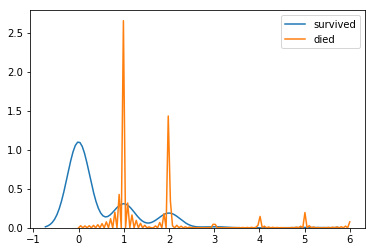

In [359]:
sns.kdeplot(ta_train.loc[ta_train['Survived']==1,'Parch'],label='survived')
sns.kdeplot(ta_train.loc[ta_train['Survived']==0,'Parch'],label='died')

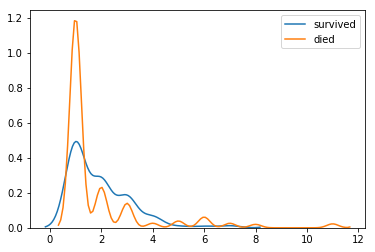

In [360]:
ttt=ta_train.copy()
ttt['fam']=ttt['SibSp']+ttt['Parch']+1
sns.kdeplot(ttt.loc[ttt['Survived']==1,'fam'],label='survived')
sns.kdeplot(ttt.loc[ttt['Survived']==0,'fam'],label='died')

In [361]:
# x6=x5.copy()
# x_test6=x_test5.copy()
# x6.head()

,Sex,SibSp,Parch,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,Age1,Age2,Age3,Age4,Age5
0,0,1,0,7.2500,0,0,1,1,0,0,0,0,1,0,0,0
1,1,1,0,71.2833,1,0,0,0,1,0,1,0,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,0,1,0,0,0
3,1,1,0,53.1000,1,0,0,1,0,0,1,0,0,1,0,0
4,0,0,0,8.0500,0,0,1,1,0,0,0,0,0,1,0,0


In [363]:
# x6['Sib1']=(x6['SibSp']==0).astype(int)
# x6['Sib2']=(x6['SibSp']==1).astype(int)
# x6['Sib3']=(x6['SibSp']==2).astype(int)
# x6['Sib4']=(x6['SibSp']>=3).astype(int)
# x6.head()

,Sex,SibSp,Parch,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,Age1,Age2,Age3,Age4,Age5,Sib1,Sib2,Sib3,Sib4
0,0,1,0,7.2500,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0
1,1,1,0,71.2833,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0
3,1,1,0,53.1000,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
4,0,0,0,8.0500,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0


In [364]:
# x_test6['Sib1']=(x_test6['SibSp']==0).astype(int)
# x_test6['Sib2']=(x_test6['SibSp']==1).astype(int)
# x_test6['Sib3']=(x_test6['SibSp']==2).astype(int)
# x_test6['Sib4']=(x_test6['SibSp']>=3).astype(int)
# x_test6.head()

,Sex,SibSp,Parch,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,Age1,Age2,Age3,Age4,Age5,Sib1,Sib2,Sib3,Sib4
0,0,0,0,7.8292,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,1,1,0,7.0000,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0
2,0,0,0,9.6875,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0
3,0,0,0,8.6625,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0
4,1,1,1,12.2875,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0


In [365]:
# x6['Par1']=(x6['Parch']==0).astype(int)
# x6['Par2']=(x6['Parch']==1).astype(int)
# x6['Par3']=(x6['Parch']==2).astype(int)
# x6['Par4']=(x6['Parch']>=3).astype(int)
# x6.head()

,Sex,SibSp,Parch,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,...,Age4,Age5,Sib1,Sib2,Sib3,Sib4,Par1,Par2,Par3,Par4
0,0,1,0,7.2500,0,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0
1,1,1,0,71.2833,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1,1,0,53.1000,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,0,0,8.0500,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [366]:
# x_test6['Par1']=(x_test6['Parch']==0).astype(int)
# x_test6['Par2']=(x_test6['Parch']==1).astype(int)
# x_test6['Par3']=(x_test6['Parch']==2).astype(int)
# x_test6['Par4']=(x_test6['Parch']>=3).astype(int)
# x_test6.head()

,Sex,SibSp,Parch,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,...,Age4,Age5,Sib1,Sib2,Sib3,Sib4,Par1,Par2,Par3,Par4
0,0,0,0,7.8292,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0
1,1,1,0,7.0000,0,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,0,9.6875,0,1,0,0,0,1,...,1,0,1,0,0,0,1,0,0,0
3,0,0,0,8.6625,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1,1,1,12.2875,0,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [367]:
# x6=x6.drop(['SibSp','Parch'],axis=1)
# x_test6=x_test6.drop(['SibSp','Parch'],axis=1)
# x6.head()

,Sex,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,Age1,...,Age4,Age5,Sib1,Sib2,Sib3,Sib4,Par1,Par2,Par3,Par4
0,0,7.2500,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,1,71.2833,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,1,7.9250,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1,53.1000,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
4,0,8.0500,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [368]:
# xg6=xgb.XGBClassifier()
# xg6=xg6.fit(x6,y)

In [369]:
# ta_test['xg6']=xg6.predict_proba(x_test6)[:,1]
# ta_test['Survived']=ta_test['xg6']
# ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Survived1,tree,lgbm,lr,rf,xg5,xg6
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.089036,0.064449,0.118812,0.015846,0.091175,0.109406,0.079291,0.089036
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.402014,0.233371,0.589744,0.117988,0.417117,0.431612,0.380656,0.402014
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.115232,0.055382,0.118812,0.148705,0.165551,0.136264,0.104349,0.115232
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.112789,0.155122,0.118812,0.509904,0.088542,0.131724,0.106107,0.112789
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.452231,0.436522,0.589744,0.493639,0.509144,0.497486,0.497442,0.452231


In [370]:
# ta_test[['PassengerId','Survived']].to_csv('my_prediction30.csv',index=False)

In [372]:
# ta_test=ta_test.drop(['xg6'],axis=1)
ta_test=ta_test.drop(['Survived1'],axis=1)
ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,tree,lgbm,lr,rf,xg5
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.089036,0.118812,0.015846,0.091175,0.109406,0.079291
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.402014,0.589744,0.117988,0.417117,0.431612,0.380656
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.115232,0.118812,0.148705,0.165551,0.136264,0.104349
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.112789,0.118812,0.509904,0.088542,0.131724,0.106107
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.452231,0.589744,0.493639,0.509144,0.497486,0.497442


# 그래프 보고 패턴 있는것 같은 요금대 범주화

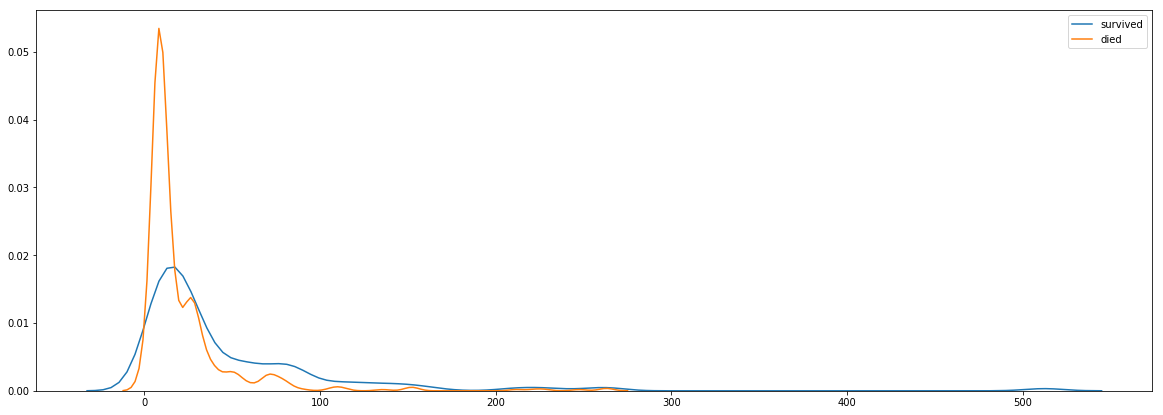

In [380]:
plt.figure(figsize=(20,7))
sns.kdeplot(ta_train.loc[ta_train['Survived']==1,'Fare'],label='survived')
sns.kdeplot(ta_train.loc[ta_train['Survived']==0,'Fare'],label='died')

In [378]:
x_test5[x_test5['Fare']==-1]

,Sex,SibSp,Parch,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,Age1,Age2,Age3,Age4,Age5
152,0,0,0,-1.0,0,0,1,1,0,0,0,0,0,0,1,0


In [718]:
ta_train[ta_train['Fare']<9]['Survived'].mean()  # 9

0.19935691318327975

In [719]:
ta_train[(ta_train['Fare']>=9)&(ta_train['Fare']<25)]['Survived'].mean()

0.3983739837398374

In [720]:
ta_train[(ta_train['Fare']>=25)&(ta_train['Fare']<85)]['Survived'].mean()

0.48880597014925375

In [721]:
ta_train[ta_train['Fare']>=85]['Survived'].mean()

0.7727272727272727

In [502]:
x6=x5.copy()
x_test6=x_test5.copy()
x6.head()

,Sex,SibSp,Parch,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,Age1,Age2,Age3,Age4,Age5
0,0,1,0,7.2500,0,0,1,1,0,0,0,0,1,0,0,0
1,1,1,0,71.2833,1,0,0,0,1,0,1,0,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,0,1,0,0,0
3,1,1,0,53.1000,1,0,0,1,0,0,1,0,0,1,0,0
4,0,0,0,8.0500,0,0,1,1,0,0,0,0,0,1,0,0


In [503]:
x6['Fare1']=(x6['Fare']<9).astype(int)
x6['Fare2']=((x6['Fare']>=9)&(x6['Fare']<25)).astype(int)
x6['Fare3']=((x6['Fare']>=25)&(x6['Fare']<85)).astype(int)
x6['Fare4']=(x6['Fare']>=85).astype(int)
x6=x6.drop(['Fare'],axis=1)
x6.head()

,Sex,SibSp,Parch,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,Age1,Age2,Age3,Age4,Age5,Fare1,Fare2,Fare3,Fare4
0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0
1,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0
3,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0


In [504]:
x_test6['Fare1']=(x_test6['Fare']<9).astype(int)   # -1도 그냥 넣어버림
x_test6['Fare2']=((x_test6['Fare']>=9)&(x_test6['Fare']<25)).astype(int)
x_test6['Fare3']=((x_test6['Fare']>=25)&(x_test6['Fare']<85)).astype(int)
x_test6['Fare4']=(x_test6['Fare']>=85).astype(int)
x_test6=x_test6.drop(['Fare'],axis=1)
x_test6.head()

,Sex,SibSp,Parch,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,Age1,Age2,Age3,Age4,Age5,Fare1,Fare2,Fare3,Fare4
0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0
3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0
4,1,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0


In [505]:
xg6=xgb.XGBClassifier()
xg6=xg6.fit(x6,y)

In [506]:
ta_test['xg6']=xg6.predict_proba(x_test6)[:,1]
ta_test['Survived']=ta_test['xg6']
ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,tree,lgbm,lr,rf,xg5,xg6
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.081135,0.118812,0.015846,0.091175,0.109406,0.079291,0.081135
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.413021,0.589744,0.117988,0.417117,0.431612,0.380656,0.413021
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.092993,0.118812,0.148705,0.165551,0.136264,0.104349,0.092993
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.113610,0.118812,0.509904,0.088542,0.131724,0.106107,0.113610
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.367130,0.589744,0.493639,0.509144,0.497486,0.497442,0.367130


In [507]:
ta_test[['PassengerId','Survived']].to_csv('my_prediction33.csv',index=False)

In [508]:
xg6.feature_importances_

array([0.35576957, 0.02456422, 0.01112711, 0.03097754, 0.01270864,
       0.18309943, 0.03801757, 0.01743345, 0.01477821, 0.10158192,
       0.05951402, 0.01635304, 0.01579145, 0.02054284, 0.01435707,
       0.02216688, 0.01215207, 0.04209006, 0.00697493], dtype=float32)

In [509]:
x6.head()

,Sex,SibSp,Parch,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,Age1,Age2,Age3,Age4,Age5,Fare1,Fare2,Fare3,Fare4
0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0
1,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0
3,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0


In [511]:
ta_test=ta_test.drop(['xg5'],axis=1)
ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,tree,lgbm,lr,rf,xg6
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.081135,0.118812,0.015846,0.091175,0.109406,0.081135
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.413021,0.589744,0.117988,0.417117,0.431612,0.413021
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.092993,0.118812,0.148705,0.165551,0.136264,0.092993
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.113610,0.118812,0.509904,0.088542,0.131724,0.113610
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.367130,0.589744,0.493639,0.509144,0.497486,0.367130


In [518]:
tree6=DecisionTreeClassifier(max_depth=3)
tree6=tree6.fit(x6,y)

In [519]:
ta_test['tree6']=tree6.predict_proba(x_test6)[:,1]
ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,tree,lgbm,lr,rf,xg6,tree6
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.081135,0.118812,0.015846,0.091175,0.109406,0.081135,0.115124
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.413021,0.589744,0.117988,0.417117,0.431612,0.413021,0.578512
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.092993,0.118812,0.148705,0.165551,0.136264,0.092993,0.115124
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.113610,0.118812,0.509904,0.088542,0.131724,0.113610,0.115124
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.367130,0.589744,0.493639,0.509144,0.497486,0.367130,0.578512


In [522]:
lgbm6=lgb.LGBMClassifier()
lgbm6=lgbm6.fit(x6,y)

In [523]:
ta_test['lgbm6']=lgbm6.predict_proba(x_test6)[:,1]
ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,tree,lgbm,lr,rf,xg6,tree6,lgbm6
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.081135,0.118812,0.015846,0.091175,0.109406,0.081135,0.115124,0.025334
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.413021,0.589744,0.117988,0.417117,0.431612,0.413021,0.578512,0.445116
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.092993,0.118812,0.148705,0.165551,0.136264,0.092993,0.115124,0.046456
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.113610,0.118812,0.509904,0.088542,0.131724,0.113610,0.115124,0.111869
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.367130,0.589744,0.493639,0.509144,0.497486,0.367130,0.578512,0.157526


In [524]:
lr6=LogisticRegression()
lr6=lr6.fit(x6,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [525]:
ta_test['lr6']=lr6.predict_proba(x_test6)[:,1]
ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,tree,lgbm,lr,rf,xg6,tree6,lgbm6,lr6
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.081135,0.118812,0.015846,0.091175,0.109406,0.081135,0.115124,0.025334,0.134688
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.413021,0.589744,0.117988,0.417117,0.431612,0.413021,0.578512,0.445116,0.467919
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.092993,0.118812,0.148705,0.165551,0.136264,0.092993,0.115124,0.046456,0.178352
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.113610,0.118812,0.509904,0.088542,0.131724,0.113610,0.115124,0.111869,0.095353
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.367130,0.589744,0.493639,0.509144,0.497486,0.367130,0.578512,0.157526,0.466931


In [553]:
rf6=RandomForestClassifier(max_depth=4,max_features=5,n_estimators=1000)
rf6=rf6.fit(x6,y)

In [554]:
ta_test['rf6']=rf6.predict_proba(x_test6)[:,1]
ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,xg6,tree6,lgbm6,lr6,rf6
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.097271,0.081135,0.115124,0.025334,0.134688,0.146196
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.425244,0.413021,0.578512,0.445116,0.467919,0.410783
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.122494,0.092993,0.115124,0.046456,0.178352,0.208696
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.113470,0.113610,0.115124,0.111869,0.095353,0.138502
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.379045,0.367130,0.578512,0.157526,0.466931,0.461023


In [528]:
ta_test=ta_test.drop(['tree','lgbm','lr','rf'],axis=1)
ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,xg6,tree6,lgbm6,lr6,rf6
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.081135,0.081135,0.115124,0.025334,0.134688,0.154506
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.413021,0.413021,0.578512,0.445116,0.467919,0.399911
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.092993,0.092993,0.115124,0.046456,0.178352,0.206877
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.113610,0.113610,0.115124,0.111869,0.095353,0.138180
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.367130,0.367130,0.578512,0.157526,0.466931,0.453230


In [546]:
ta_test['Survived']=ta_test['xg6']*0.55 + ta_test['lgbm6']*0.1 + ta_test['lr6']*0.2 + ta_test['rf6']*0.15
ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,xg6,tree6,lgbm6,lr6,rf6
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.097271,0.081135,0.115124,0.025334,0.134688,0.154506
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.425244,0.413021,0.578512,0.445116,0.467919,0.399911
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.122494,0.092993,0.115124,0.046456,0.178352,0.206877
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.113470,0.113610,0.115124,0.111869,0.095353,0.138180
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.379045,0.367130,0.578512,0.157526,0.466931,0.453230


In [547]:
ta_test[['PassengerId','Survived']].to_csv('my_prediction40.csv',index=False)

# Name 전처리 해보기

In [558]:
x7=x6.copy()
x_test7=x_test6.copy()
x7.head()

,Sex,SibSp,Parch,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,Age1,Age2,Age3,Age4,Age5,Fare1,Fare2,Fare3,Fare4
0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0
1,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0
3,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0


In [559]:
x7['Name']=ta_train['Name']
x_test7['Name']=ta_test['Name']
x7.head()

,Sex,SibSp,Parch,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,Age1,Age2,Age3,Age4,Age5,Fare1,Fare2,Fare3,Fare4,Name
0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,"Braund, Mr. Owen Harris"
1,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,"Heikkinen, Miss. Laina"
3,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,"Allen, Mr. William Henry"


In [560]:
x7['Title']=x7.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(x7['Title'],x7['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [562]:
x7['Title']=x7['Title'].replace(['Lady','Countess','Capt','Col',\
                                 'Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
x7['Title']=x7['Title'].replace('Mlle','Miss')
x7['Title']=x7['Title'].replace('Ms','Miss')
x7['Title']=x7['Title'].replace('Mme','Mrs')
x7['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

In [563]:
x_test7['Title']=x_test7.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(x_test7['Title'],x_test7['Sex'])

Sex,0,1
Title,,
Col,2,0
Dona,0,1
Dr,1,0
Master,21,0
Miss,0,78
Mr,240,0
Mrs,0,72
Ms,0,1
Rev,2,0


In [564]:
x_test7['Title']=x_test7['Title'].replace(['Col','Dr','Rev','Dona'],'Rare')
x_test7['Title']=x_test7['Title'].replace('Ms','Miss')
x_test7['Title'].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: Title, dtype: int64

In [566]:
title_mapping={'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Rare':5}
x7['Title']=x7['Title'].map(title_mapping)
x_test7['Title']=x_test7['Title'].map(title_mapping)
x7['Title'].value_counts()

1    517
2    185
3    126
4     40
5     23
Name: Title, dtype: int64

In [567]:
x_test7['Title'].value_counts()

1    240
2     79
3     72
4     21
5      6
Name: Title, dtype: int64

In [569]:
x7.head()

,Sex,SibSp,Parch,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,...,Age2,Age3,Age4,Age5,Fare1,Fare2,Fare3,Fare4,Name,Title
0,0,1,0,0,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,"Braund, Mr. Owen Harris",1
1,1,1,0,1,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",3
2,1,0,0,0,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,"Heikkinen, Miss. Laina",2
3,1,1,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",3
4,0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,1,0,0,0,"Allen, Mr. William Henry",1


In [568]:
T_dummy=pd.get_dummies(x7['Title'])
T_dummy.head()

,1,2,3,4,5
0,1,0,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,1,0,0,0,0


In [570]:
x7=x7.join(T_dummy.add_prefix('Title'))
x7=x7.drop(['Title','Name'],axis=1)
x7.head()

,Sex,SibSp,Parch,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,...,Age5,Fare1,Fare2,Fare3,Fare4,Title1,Title2,Title3,Title4,Title5
0,0,1,0,0,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,1,1,0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
2,1,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,1,1,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [571]:
T_dummy2=pd.get_dummies(x_test7['Title'])
T_dummy2.head()

,1,2,3,4,5
0,1,0,0,0,0
1,0,0,1,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0


In [572]:
x_test7=x_test7.join(T_dummy2.add_prefix('Title'))
x_test7=x_test7.drop(['Title','Name'],axis=1)
x_test7.head()

,Sex,SibSp,Parch,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,...,Age5,Fare1,Fare2,Fare3,Fare4,Title1,Title2,Title3,Title4,Title5
0,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
1,1,1,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,1,1,1,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [573]:
xg7=xgb.XGBClassifier()
xg7=xg7.fit(x7,y)

In [574]:
ta_test['xg7']=xg7.predict_proba(x_test7)[:,1]
ta_test['Survived']=ta_test['xg7']
ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,xg6,tree6,lgbm6,lr6,rf6,xg7
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.068835,0.081135,0.115124,0.025334,0.134688,0.146196,0.068835
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.503332,0.413021,0.578512,0.445116,0.467919,0.410783,0.503332
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.077538,0.092993,0.115124,0.046456,0.178352,0.208696,0.077538
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.107646,0.113610,0.115124,0.111869,0.095353,0.138502,0.107646
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.395231,0.367130,0.578512,0.157526,0.466931,0.461023,0.395231


In [576]:
ta_test[['PassengerId','Survived']].to_csv('my_prediction41.csv',index=False)

In [577]:
ta_test['Survived']=ta_test['xg6']*0.7 + ta_test['lgbm6']*0.15 + ta_test['lr6']*0.15
ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,xg6,tree6,lgbm6,lr6,rf6,xg7
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.080798,0.081135,0.115124,0.025334,0.134688,0.146196,0.068835
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.426070,0.413021,0.578512,0.445116,0.467919,0.410783,0.503332
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.098817,0.092993,0.115124,0.046456,0.178352,0.208696,0.077538
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.110610,0.113610,0.115124,0.111869,0.095353,0.138502,0.107646
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.350660,0.367130,0.578512,0.157526,0.466931,0.461023,0.395231


In [578]:
ta_test[['PassengerId','Survived']].to_csv('my_prediction42.csv',index=False)

In [610]:
# x8=x5.copy()
# x_test8=x_test5.copy()
# x8.head()    # Fare 다시해보셈

,Sex,SibSp,Parch,Fare,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,Age1,Age2,Age3,Age4,Age5
0,0,1,0,7.2500,0,0,1,1,0,0,0,0,1,0,0,0
1,1,1,0,71.2833,1,0,0,0,1,0,1,0,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,0,1,0,0,0
3,1,1,0,53.1000,1,0,0,1,0,0,1,0,0,1,0,0
4,0,0,0,8.0500,0,0,1,1,0,0,0,0,0,1,0,0


In [611]:
# x8['Fare1']=(x8['Fare']<9).astype(int)
# x8['Fare2']=((x8['Fare']>=9)&(x8['Fare']<25)).astype(int)
# x8['Fare3']=((x8['Fare']>=25)&(x8['Fare']<27)).astype(int)
# x8['Fare4']=((x8['Fare']>=27)&(x8['Fare']<30)).astype(int)
# x8['Fare5']=((x8['Fare']>=30)&(x8['Fare']<85)).astype(int)
# x8['Fare6']=(x8['Fare']>=85).astype(int)
# x8=x8.drop(['Fare'],axis=1)
# x8.head()

,Sex,SibSp,Parch,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,...,Age2,Age3,Age4,Age5,Fare1,Fare2,Fare3,Fare4,Fare5,Fare6
0,0,1,0,0,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,1,1,0,1,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,1,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [612]:
# x_test8['Fare1']=(x_test8['Fare']<9).astype(int)
# x_test8['Fare2']=((x_test8['Fare']>=9)&(x_test8['Fare']<25)).astype(int)
# x_test8['Fare3']=((x_test8['Fare']>=25)&(x_test8['Fare']<27)).astype(int)
# x_test8['Fare4']=((x_test8['Fare']>=27)&(x_test8['Fare']<30)).astype(int)
# x_test8['Fare5']=((x_test8['Fare']>=30)&(x_test8['Fare']<85)).astype(int)
# x_test8['Fare6']=(x_test8['Fare']>=85).astype(int)
# x_test8=x_test8.drop(['Fare'],axis=1)
# x_test8.head()

,Sex,SibSp,Parch,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,...,Age2,Age3,Age4,Age5,Fare1,Fare2,Fare3,Fare4,Fare5,Fare6
0,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,1,1,0,0,0,1,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,1,1,1,0,0,1,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [613]:
# xg8=xgb.XGBClassifier()
# xg8=xg8.fit(x8,y)

In [614]:
# ta_test['xg8']=xg8.predict_proba(x_test8)[:,1]
# ta_test['Survived']=ta_test['xg8']
# ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,xg6,tree6,lgbm6,lr6,rf6,xg7,xg8
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.088724,0.081135,0.115124,0.025334,0.134688,0.146196,0.068835,0.088724
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.389625,0.413021,0.578512,0.445116,0.467919,0.410783,0.503332,0.389625
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.075495,0.092993,0.115124,0.046456,0.178352,0.208696,0.077538,0.075495
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.117143,0.113610,0.115124,0.111869,0.095353,0.138502,0.107646,0.117143
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.387458,0.367130,0.578512,0.157526,0.466931,0.461023,0.395231,0.387458


In [615]:
# ta_test[['PassengerId','Survived']].to_csv('my_prediction43.csv',index=False)

# x6 ㄱㄱ

In [617]:
x6.head()

,Sex,SibSp,Parch,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,Age1,Age2,Age3,Age4,Age5,Fare1,Fare2,Fare3,Fare4
0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0
1,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0
3,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0


In [618]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [622]:
def modelfit(alg,dtrain,useTrainCV=True,cv_folds=5,early_stopping_rounds=100):
    global y
    if useTrainCV:
        xgb_param=alg.get_xgb_params()
        xgtrain=xgb.DMatrix(dtrain.values,label=y.values)
        cvresult=xgb.cv(xgb_param,xgtrain,num_boost_round=alg.get_params()['n_estimators'],nfold=cv_folds,metrics='error',early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
        print(alg)
    alg.fit(dtrain,y,eval_metric='error')
    dtrain_predictions=alg.predict(dtrain)
    dtrain_predprob=alg.predict_proba(dtrain)[:,1]
    print("\nModel Report")
    print("Training Accuracy : {}".format(metrics.accuracy_score(y.values,dtrain_predictions)))

In [623]:
xgb1=xgb.XGBClassifier(
    learning_rate =0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=-1,
    scale_pos_weight=1,
    seed=69
)
modelfit(xgb1,x6)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=88,
       n_jobs=1, nthread=-1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=69, silent=True,
       subsample=0.8)

Model Report
Training Accuracy : 0.8619528619528619


In [644]:
from tpot import TPOTClassifier

In [645]:
tp=TPOTClassifier(generations=5,population_size=20,verbosity=2)
tp.fit(x6,y)

Generation 1 - Current best internal CV score: 0.8261109083771222
Generation 2 - Current best internal CV score: 0.8261109083771222
Generation 3 - Current best internal CV score: 0.8261109083771222
Generation 4 - Current best internal CV score: 0.8261109083771222
Generation 5 - Current best internal CV score: 0.8261109083771222

Best pipeline: GradientBoostingClassifier(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), learning_rate=0.1, max_depth=2, max_features=0.25, min_samples_leaf=10, min_samples_split=10, n_estimators=100, subsample=0.55)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
        disable_update_check=False, early_stop=None, generations=5,
        max_eval_time_mins=5, max_time_mins=None, memory=None,
        mutation_rate=0.9, n_jobs=1, offspring_size=None,
        periodic_checkpoint_folder=None, population_size=20,
        random_state=None, scoring=None, subsample=1.0,
        template='RandomTree', use_dask=False, verbosity=2,
        warm_start=False)

In [651]:
ta_test['tp']=tp.predict_proba(x_test6)[:,1]
ta_test['Survived']=ta_test['tp']
ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,xg6,tree6,lgbm6,lr6,rf6,xg7,xg66,tp
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.102428,0.081135,0.115124,0.025334,0.134688,0.146196,0.068835,0.052382,0.102428
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.449026,0.413021,0.578512,0.445116,0.467919,0.410783,0.503332,0.408334,0.449026
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.139083,0.092993,0.115124,0.046456,0.178352,0.208696,0.077538,0.054707,0.139083
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.115712,0.113610,0.115124,0.111869,0.095353,0.138502,0.107646,0.114863,0.115712
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.348227,0.367130,0.578512,0.157526,0.466931,0.461023,0.395231,0.344849,0.348227


In [652]:
ta_test[['PassengerId','Survived']].to_csv('my_prediction45.csv',index=False)

In [688]:
from hyperopt import Trials, STATUS_OK, tpe, hp, fmin
param_test2={
    'max_depth' : hp.choice('max_depth', range(4, 7, 1)),
    'n_estimators' : hp.choice('n_estimators', range(100, 205, 5)),
    'subsample' : hp.quniform('subsample', 0.5, 1, 0.1),
    'colsample_bytree' : hp.quniform('colsample_bytree', 0.5, 1, 0.1)
}

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [689]:
# param_test1={'max_depth':range(4,7),'subsample':[i/10.0 for i in range(6,11)],
#             'colsample_bytree':[i/10.0 for i in range(6,11)],'n_estimators':range(100,200)}
# #             'learning_rate':[(i+1)/100.0 if i==9 else i/100.0 for i in range(1,11,4)]}
gsearch1=GridSearchCV(estimator = xgb.XGBClassifier(),
                      param_grid = param_test2, scoring='accuracy',n_jobs=-1,iid=False, cv=4, verbose=0)
gsearch1.fit(x6,y)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

ValueError: Parameter values for parameter (max_depth) need to be a sequence(but not a string) or np.ndarray.

In [679]:
xg6_1=xgb.XGBClassifier(colsample_bytree=0.6,max_depth=3,
                       min_child_weight=2,subsample=0.7)
xg6_1=xg6_1.fit(x6,y)

In [680]:
ta_test['xg6_1']=xg6_1.predict_proba(x_test6)[:,1]
ta_test['Survived']=ta_test['xg6_1']
ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,xg6,tree6,lgbm6,lr6,rf6,xg7,tp,xg6_1
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.074288,0.081135,0.115124,0.025334,0.134688,0.146196,0.068835,0.102428,0.074288
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.402140,0.413021,0.578512,0.445116,0.467919,0.410783,0.503332,0.449026,0.402140
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.091574,0.092993,0.115124,0.046456,0.178352,0.208696,0.077538,0.139083,0.091574
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.112921,0.113610,0.115124,0.111869,0.095353,0.138502,0.107646,0.115712,0.112921
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.286368,0.367130,0.578512,0.157526,0.466931,0.461023,0.395231,0.348227,0.286368


In [681]:
ta_test[['PassengerId','Survived']].to_csv('my_prediction46.csv',index=False)

In [699]:
xg6_1=xgb.XGBClassifier()
xg6_1=xg6_1.fit(x6,y)

In [700]:
ta_test['xg6_1']=xg6_1.predict_proba(x_test6)[:,1]
ta_test['Survived']=ta_test['xg6_1']
ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,xg6,tree6,lgbm6,lr6,rf6,xg7,tp,xg6_1
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.047121,0.081135,0.115124,0.025334,0.134688,0.146196,0.068835,0.102428,0.047121
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.386650,0.413021,0.578512,0.445116,0.467919,0.410783,0.503332,0.449026,0.386650
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.058326,0.092993,0.115124,0.046456,0.178352,0.208696,0.077538,0.139083,0.058326
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.124831,0.113610,0.115124,0.111869,0.095353,0.138502,0.107646,0.115712,0.124831
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.319413,0.367130,0.578512,0.157526,0.466931,0.461023,0.395231,0.348227,0.319413


In [696]:
ta_test[['PassengerId','Survived']].to_csv('my_prediction48.csv',index=False)

In [701]:
lgbm6=lgb.LGBMClassifier()
lgbm6=lgbm6.fit(x6,y)
ta_test['lgbm6']=lgbm6.predict_proba(x_test6)[:,1]
ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,xg6,tree6,lgbm6,lr6,rf6,xg7,tp,xg6_1
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.047121,0.081135,0.115124,0.025334,0.134688,0.146196,0.068835,0.102428,0.047121
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.386650,0.413021,0.578512,0.445116,0.467919,0.410783,0.503332,0.449026,0.386650
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.058326,0.092993,0.115124,0.046456,0.178352,0.208696,0.077538,0.139083,0.058326
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.124831,0.113610,0.115124,0.111869,0.095353,0.138502,0.107646,0.115712,0.124831
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.319413,0.367130,0.578512,0.157526,0.466931,0.461023,0.395231,0.348227,0.319413


In [708]:
ta_test['Survived']=ta_test['xg6']*0.95 + ta_test['lgbm6']*0.02 + ta_test['rf6']*0.01 + ta_test['lr6']*0.01 + ta_test['tree6']*0.01
ta_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,xg6,tree6,lgbm6,lr6,rf6,xg7,tp,xg6_1
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.081545,0.081135,0.115124,0.025334,0.134688,0.146196,0.068835,0.102428,0.047121
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.415845,0.413021,0.578512,0.445116,0.467919,0.410783,0.503332,0.449026,0.386650
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.094295,0.092993,0.115124,0.046456,0.178352,0.208696,0.077538,0.139083,0.058326
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.113656,0.113610,0.115124,0.111869,0.095353,0.138502,0.107646,0.115712,0.124831
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.366989,0.367130,0.578512,0.157526,0.466931,0.461023,0.395231,0.348227,0.319413


In [709]:
ta_test[['PassengerId','Survived']].to_csv('my_prediction52.csv',index=False)

In [711]:
x8=x6.copy()
x_test8=x_test6.copy()

In [712]:
sd=pd.get_dummies(x8['Sex'])
sd.head()

,0,1
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


In [713]:
x8=x8.join(sd.add_prefix('Sex'))
x8=x8.drop(['Sex'],axis=1)
x8.head()

,SibSp,Parch,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,Age1,Age2,Age3,Age4,Age5,Fare1,Fare2,Fare3,Fare4,Sex0,Sex1
0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1
2,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1
4,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0


In [714]:
sd2=pd.get_dummies(x_test8['Sex'])
sd2.head()

,0,1
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1


In [715]:
x_test8=x_test8.join(sd2.add_prefix('Sex'))
x_test8=x_test8.drop(['Sex'],axis=1)
x_test8.head()

,SibSp,Parch,Pclass1,Pclass2,Pclass3,Embarked1,Embarked2,Embarked3,Cabin,Age1,Age2,Age3,Age4,Age5,Fare1,Fare2,Fare3,Fare4,Sex0,Sex1
0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
2,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0
3,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1


In [716]:
xg8=xgb.XGBClassifier()
xg8=xg8.fit(x8,y)

In [717]:
ta_test['xg8']=xg8.predict_proba(x_test8)[:,1]
ta_test['Survived']=ta_test['xg8']
ta_test.head()  # 똑같음ㅋ

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Survived,xg6,tree6,lgbm6,lr6,rf6,xg7,tp,xg6_1,xg8
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,0.081135,0.081135,0.115124,0.025334,0.134688,0.146196,0.068835,0.102428,0.047121,0.081135
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,0.413021,0.413021,0.578512,0.445116,0.467919,0.410783,0.503332,0.449026,0.386650,0.413021
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,0.092993,0.092993,0.115124,0.046456,0.178352,0.208696,0.077538,0.139083,0.058326,0.092993
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,0.113610,0.113610,0.115124,0.111869,0.095353,0.138502,0.107646,0.115712,0.124831,0.113610
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,0.367130,0.367130,0.578512,0.157526,0.466931,0.461023,0.395231,0.348227,0.319413,0.367130
